# Task 4: Classification with Logistic Regression

#### 1.Importing the dataset and preprocessing

In [123]:
import numpy as np
import pandas as pd


In [124]:
#importing the dataset
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [125]:
data.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [126]:
data=data.drop(['Unnamed: 32'],axis=1)

In [127]:
#encoding categorical variables
cat_cols=data.select_dtypes(include=['object']).columns
cat_cols

Index(['diagnosis'], dtype='object')

In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[cat_cols] = data[cat_cols].apply(le.fit_transform)

#### 2.Splitting and Standardizing the data 

In [129]:
X = data.drop(columns=['id', 'diagnosis'], axis=1)
y=data['diagnosis']


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
#Standardizing the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [132]:
print(X_train_scaled.shape,y_train.shape)
print(X_test_scaled.shape,y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


#### 3.Fitting the Logistic Regression model

In [133]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(
    penalty='l2',           
    C=1.0,                  
    solver='lbfgs',         
    max_iter=1000,          
    random_state=42
)

In [134]:
logreg.fit(X_train_scaled,y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [135]:
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (Malignant)
print(y_pred_proba)

[0.1842328  0.96227782 0.83567673 0.06224913 0.02321379 0.99991966
 0.99910508 0.69699994 0.51657343 0.0409534  0.12298146 0.73152878
 0.08090696 0.67055971 0.046187   0.97457886 0.05776595 0.00752418
 0.00155008 0.99363317 0.2756052  0.07962466 0.99944895 0.00819802
 0.03498708 0.05766606 0.06051316 0.07697493 0.06463183 0.99026042
 0.03917105 0.01824284 0.02144178 0.06750758 0.01595899 0.0343927
 0.49217054 0.0249015  0.95694127 0.16007069 0.01524753 0.86277445
 0.07557279 0.0360496  0.080015   0.10530264 0.02229873 0.01212288
 0.12043052 0.0596998  0.94629337 0.99658789 0.34599523 0.13340486
 0.02031656 0.09038862 0.02667151 0.99996248 0.71293846 0.01990893
 0.08057484 0.99480215 0.99774676 0.12688819 0.02458033 0.21629468
 0.98244709 0.9997303  0.0315351  0.14824924 0.82465506 0.88471502
 0.06474081 0.92389508 0.00471215 0.13686955 0.11069207 0.43557777
 0.00743636 0.11860086 0.82903761 0.00816867 0.53226103 0.99812013
 0.79893217 0.94664247 0.98201585 0.96569837 0.05489113 0.08493

#### 4.Evaluating the model

In [136]:
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             precision_recall_curve, auc,accuracy_score)
import matplotlib.pyplot as plt
import seaborn as sns

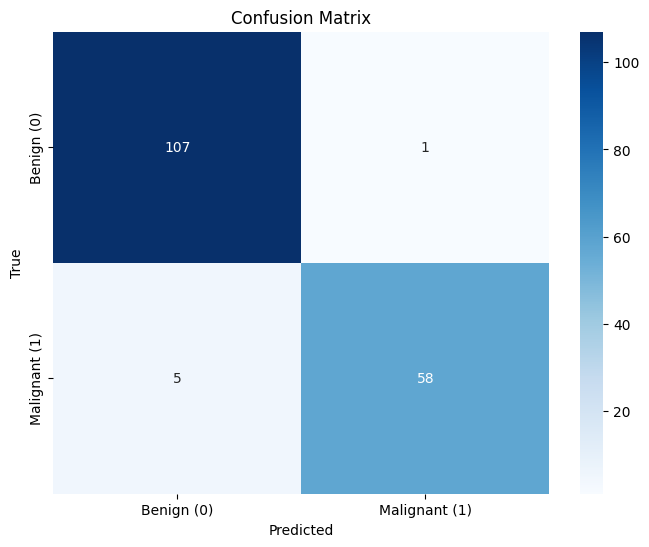


Key Metrics:
Precision: 0.9831
Recall:    0.9206
F1-Score:  0.9508


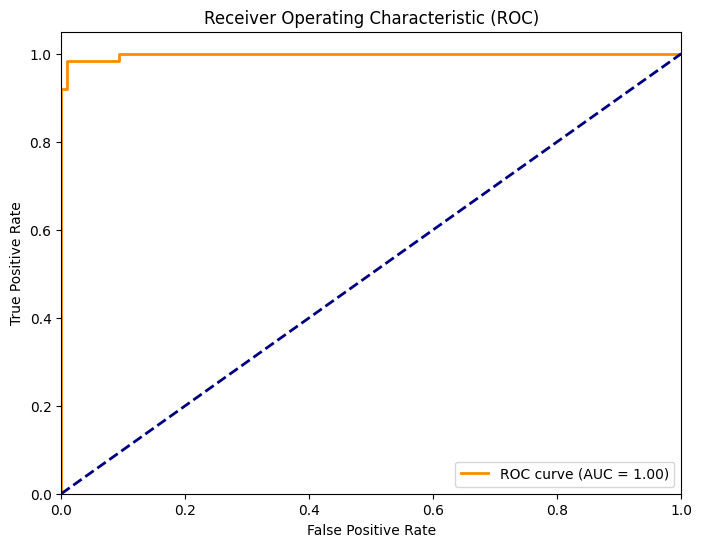

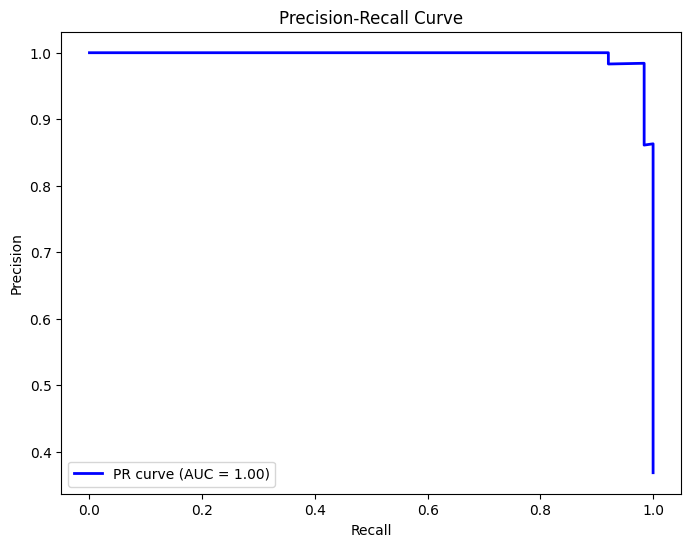

In [137]:

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (0)', 'Malignant (1)'], 
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2. Precision, Recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nKey Metrics:")
print(f"Precision: {precision:.4f}")  
print(f"Recall:    {recall:.4f}")    
print(f"F1-Score:  {f1:.4f}")        

# 3. ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, 
         label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [138]:

# 5. Key Metrics Summary
print(f"\nSummary Metrics:")
print(f"ROC-AUC:   {roc_auc:.4f}")
print(f"PR-AUC:    {pr_auc:.4f} ")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")


Summary Metrics:
ROC-AUC:   0.9979
PR-AUC:    0.9968 
Accuracy:  0.9649


#### 5.Tuning the threshold

In [139]:
# Define threshold range
thresholds = np.linspace(0.1, 0.9, 50)

# Calculate metrics for each threshold
recalls, precisions = [], []
for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    recalls.append(recall_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh))

# Find optimal threshold (prioritize recall > 95%)
optimal_idx = np.argmax(np.array(recalls) >= 0.95)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Recall at this threshold: {recalls[optimal_idx]:.4f}")
print(f"Precision at this threshold: {precisions[optimal_idx]:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

Optimal Threshold: 0.10
Recall at this threshold: 1.0000
Precision at this threshold: 0.6923


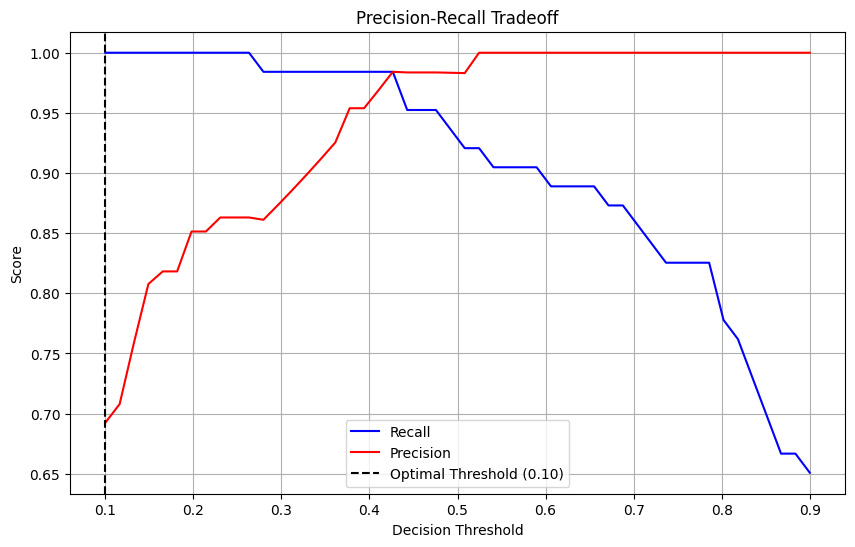

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, 'b-', label='Recall')
plt.plot(thresholds, precisions, 'r-', label='Precision')
plt.axvline(optimal_threshold, color='k', linestyle='--', 
            label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

#### 6.Explaining the Sigmoid function

The sigmoid function is the mathematical core of logistic regression that converts linear predictions into probabilities.And by using the probabilities we can perform the binary classification.

Mathematical representation: \
The standard sigmoid function, also known as the logistic function, is defined as: \

σ(z) = 1 / (1 + exp(-z)) \

where: \
z = linear combination of features and weights (z = w₀ + w₁x₁ + ... + wₙxₙ) \
σ(z) is the sigmoid function evaluated at input z. \
exp(-z) is the exponential function with input -z.

Key Properties: \
S-shaped curve that maps any real number to [0,1] range \
Output represents probability of positive class (malignant) \
Decision threshold default = 0.5. \
If σ(z) ≥ 0.5 → Predict class 1 (malignant) \
If σ(z) < 0.5 → Predict class 0 (benign)

